In [19]:
import yfinance as yf
import pmdarima
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
import math
from statsmodels.tsa.tsatools import lagmat


In [2]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 12, 1)
tickers = ['XOM','CVX', 'TTE', 'COP']

In [3]:
### function pour telecharger les données

def download_stock_data(stock, start_date, end_date):
    
    stock_data = yf.download(stock, start=start_date, end=end_date)

    stock_data.reset_index(inplace=True)

    stock_data['Stock'] = stock

    return stock_data

In [4]:
# fonction pour stocker les donnéées dans un dataframe

def aggregate_stocks(stocks, start_date, end_date):
    
    all_stock_data = []

    for stock in stocks:
        stock_data = download_stock_data(stock, start_date, end_date)

        all_stock_data.append(stock_data)
      

    Data = pd.concat(all_stock_data, axis=1, keys=tickers)

    
    return Data

In [5]:
oil_company = aggregate_stocks(
    stocks = tickers, 
    start_date=start_date,
    end_date=end_date
)
oil_company.info()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   (XOM, Date)       483 non-null    datetime64[ns]
 1   (XOM, Open)       483 non-null    float64       
 2   (XOM, High)       483 non-null    float64       
 3   (XOM, Low)        483 non-null    float64       
 4   (XOM, Close)      483 non-null    float64       
 5   (XOM, Adj Close)  483 non-null    float64       
 6   (XOM, Volume)     483 non-null    int64         
 7   (XOM, Stock)      483 non-null    object        
 8   (CVX, Date)       483 non-null    datetime64[ns]
 9   (CVX, Open)       48

In [6]:
oil_company.head()

XOM                                                                   \
        Date       Open       High        Low      Close  Adj Close    Volume   
0 2020-01-02  70.239998  71.019997  70.239998  70.900002  56.088303  12456400   
1 2020-01-03  71.339996  71.370003  70.160004  70.330002  55.637375  17386900   
2 2020-01-06  70.320000  71.360001  70.230003  70.870003  56.064571  20081900   
3 2020-01-07  70.500000  70.519997  69.510002  70.290001  55.605747  17387700   
4 2020-01-08  70.110001  70.290001  69.169998  69.230003  54.767178  15137700   

               CVX              ...      TTE              COP             \
  Stock       Date        Open  ...   Volume Stock       Date       Open   
0   XOM 2020-01-02  120.809998  ...  1166500   TTE 2020-01-02  65.279999   
1   XOM 2020-01-03  121.779999  ...  1519000   TTE 2020-01-03  67.040001   
2   XOM 2020-01-06  121.239998  ...  3516900   TTE 2020-01-06  66.279999   
3   XOM 2020-01-07  119.019997  ...  2463000   TTE 2020-01-07  66.440002   
4   XOM 2020-01-08  118.550003  ...  2831400   TTE 2020-01-08  66.449997   

                                                              
        High        Low      Close  Adj Close   Volume Stock  
0  65.680000  64.849998  65.459999  54.762154  4122800   COP  
1  67.129997  65.070000  65.699997  54.962933  6333200   COP  
2  66.940002  65.879997  66.480003  55.615459  8823800   COP  
3  66.489998  65.739998  66.480003  55.615459  5974800   COP  
4  66.629997  64.519997  64.940002  54.327148  6470100   COP  

[5 rows x 32 columns]

In [7]:
price =pd.DataFrame()
for tick in tickers:
    price[f'{tick}_price'] = oil_company[tick]['Adj Close']
price.index= oil_company[tickers[0]]['Date']
price.head()

,XOM_price,CVX_price,TTE_price,COP_price
Date,,,,
2020-01-02,56.088303,98.217049,41.213535,54.762154
2020-01-03,55.637375,97.877335,41.362671,54.962933
2020-01-06,56.064571,97.545692,42.138172,55.615459
2020-01-07,55.605747,96.300095,41.899551,55.615459
2020-01-08,54.767178,95.200089,41.646023,54.327148


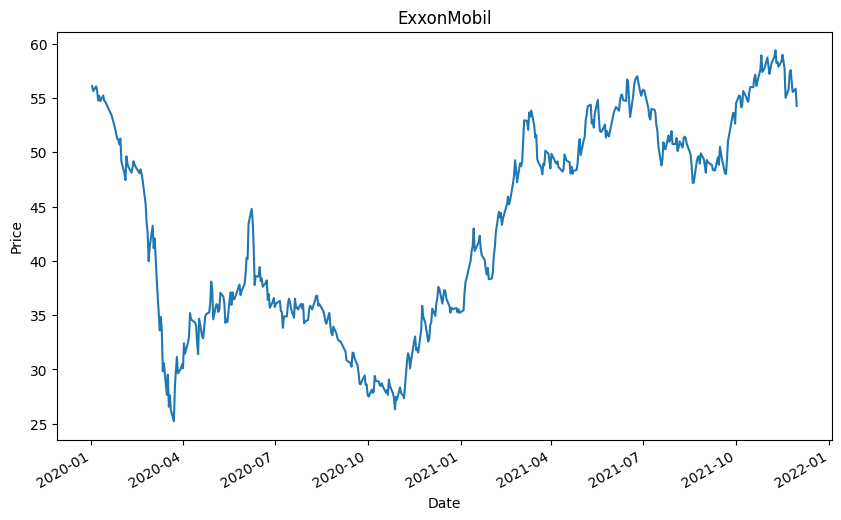

In [8]:
price['XOM_price'].plot(style="-", figsize=(10, 6), title="ExxonMobil")
plt.ylabel('Price')
plt.show()

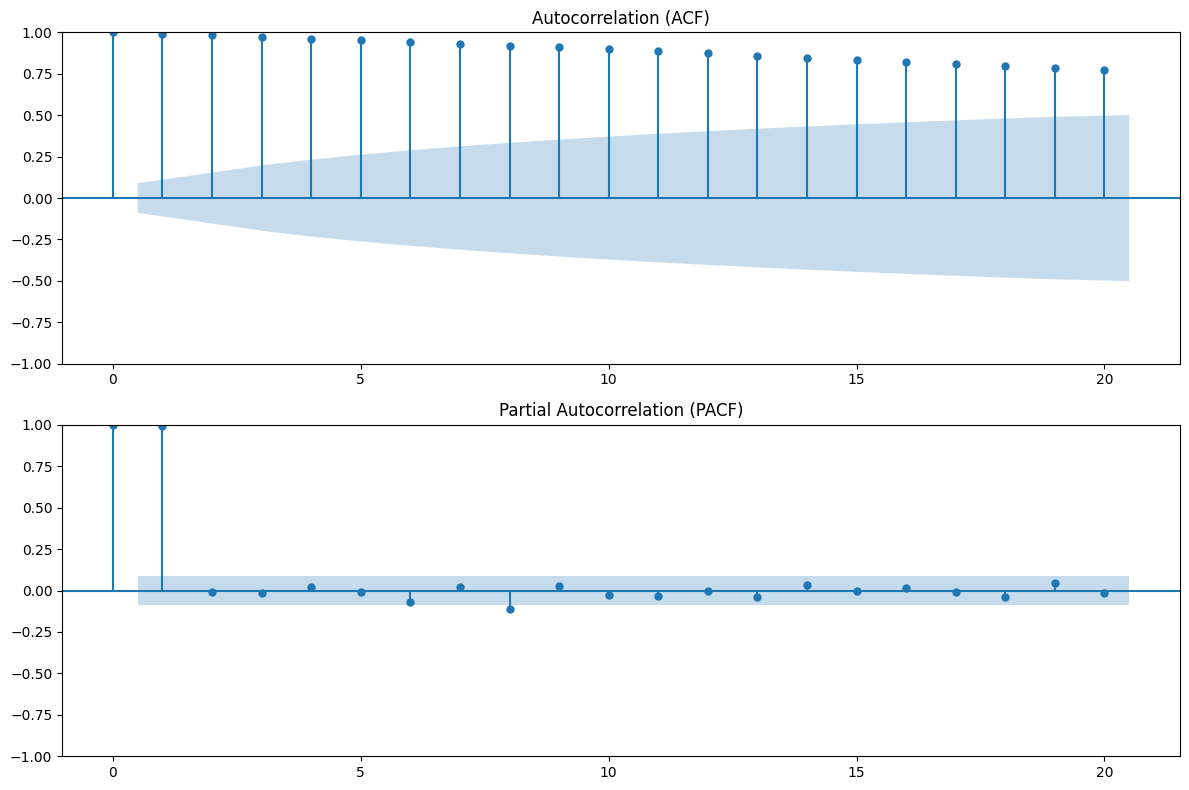

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(price['XOM_price'], lags=20, ax=ax[0])
ax[0].set_title('Autocorrelation (ACF)')
sm.graphics.tsa.plot_pacf(price['XOM_price'], lags=20, ax=ax[1])
ax[1].set_title('Partial Autocorrelation (PACF)')
plt.tight_layout()
plt.show()


In [11]:
XOM = pd.DataFrame()
XOM['Price']= price['XOM_price']
XOM['log'] = [math.log(i) for i in XOM['Price']]
XOM.head()


,Price,log
Date,,
2020-01-02,56.088303,4.026927
2020-01-03,55.637375,4.018855
2020-01-06,56.064571,4.026504
2020-01-07,55.605747,4.018287
2020-01-08,54.767178,4.003091


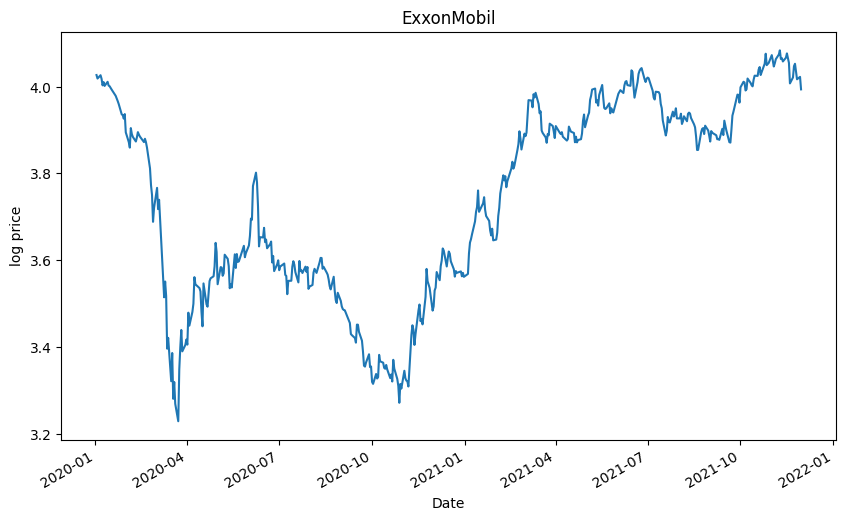

In [12]:
XOM['log'].plot(style="-", figsize=(10, 6), title="ExxonMobil")
plt.ylabel('log price')
plt.show()

In [13]:
XOM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 483 entries, 2020-01-02 to 2021-11-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   483 non-null    float64
 1   log     483 non-null    float64
dtypes: float64(2)
memory usage: 11.3 KB


In [14]:
XOM.isnull().sum()

Price    0
log      0
dtype: int64

We have prepared the data well, and now we can start analyzing the time series. 

The first step in time series analysis is to check whether the series is stationary or not.

The ADF test: This test helps determine whether a time series has a unit root, which implies that it is non-stationary and follows a random process.

There are several versions of this test: with both a constant and a trend, or with just a constant, etc. In addition, we can add lags in the regression if necessary.

We will follow the algorithm of ADF test. 



First, we start with Model 3, which is based on the regression with both a trend and a constant.

To do this, we will do the ADF test on the normal series, meaning on 𝑋_𝑡 not on Δ𝑋_𝑡

The goal is to check if the series has a unit root and also to determine the number of lags.

In [16]:


adf_test = adfuller(XOM['log'], regression = 'ct', autolag='AIC')

df_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lag Used', 'Number of Observations'])

# Ajouter les valeurs critiques au DataFrame
for key, value in adf_test[4].items():
    df_output[f'Critical Value {key}'] = value

print(df_output)


Test Statistic             -3.195375
p-value                     0.085327
Lag Used                   10.000000
Number of Observations    472.000000
Critical Value 1%          -3.978079
Critical Value 5%          -3.419833
Critical Value 10%         -3.132546
dtype: float64


If the p-value > 0.05, we accept H0, which refers to the presence of a unit root, in other words, the non-stationarity of the series.



We see that the p-value is equal to 0.08, so we accept H0. To correct the non-stationarity, we will apply the first difference to the series. After that, we will run an OLS regression on the first difference values. In other words, the first difference value will be the dependent variable. For the explanatory variables, we will include the trend and the constant as well as the lags of the differenced value. Based on the Akaike Information Criterion (AIC), we will choose the number of lags. Above, we see that "Lag Used" is 10 based on AIC, so we will add all these lags into regression.




Model 3 has two joint hypotheses :

H0_3: (c, b, 𝜌) = (c, 0, 0)

H0_2: (c, b, 𝜌) = (0, 0, 0)



ρ = 0 which indicates the absence of a unit root

c = c which indicates the presence of a constant

b = 0, which indicates the absence of a trend


First, we start by testing hypothesis H0_3. To do this, we will perform the following regression:

ΔX_t = ( ρ * X_{t-1} ) + c + (b * t) + ( ΣΦ_j * ΔX_{t-j} ) + ε_t

Note : ΣΦ_j * ΔX_{t-j} depends on the number of lags. 

j is the number of lag

Φ is the coefficient of the lags

ΔX_{t-j} are the lags


Imagine there is 2 lags: ( Φ_1 * ΔX_{t-1} ) + ( Φ_2 * ΔX_{t-2} )

In [20]:
X = XOM['log']

ΔX = X.diff().dropna()

X_lagged = X.shift(1).dropna()

p = adf_test[2] 
lagged_diff = lagmat(ΔX, maxlag=p, trim='both')  

ΔX = ΔX.iloc[p:]  
X_lagged = X_lagged.iloc[p:]  

n = len(ΔX)
t = np.arange(n)

Z = pd.DataFrame(lagged_diff[:, :p], columns=[f"ΔX_t-{i}" for i in range(1, p+1)], index=ΔX.index)
Z['Y_{t-1}'] = X_lagged.values
Z['trend'] = t
Z = sm.add_constant(Z)  

model_3 = sm.OLS(ΔX, Z)
results = model_3.fit()

SCR3 = results.ssr

print(f" Sum of Squared Residuals (SCR) of the unconstrained model3 : {SCR3}")
print("\n")
print(results.summary())


 Sum of Squared Residuals (SCR) of the unconstrained model : 0.330154539069259


                            OLS Regression Results                            
Dep. Variable:                    log   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.782
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           1.69e-05
Time:                        20:57:32   Log-Likelihood:                 1044.8
No. Observations:                 472   AIC:                            -2064.
Df Residuals:                     459   BIC:                            -2010.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

The constrained model only includes a constant: that is, the regression is performed between ΔX, its lags, and the constant.

We refer to it as the constrained model because we impose limits in the regression by excluding 𝜌 and 𝑡; we assume they are zero and perform the regression accordingly

In [23]:
Z = pd.DataFrame(lagged_diff[:, :p], columns=[f"ΔX_{i}" for i in range(1, p+1)], index=ΔX.index)

Z = sm.add_constant(Z)  

first_contrained_model = sm.OLS(ΔX, Z)
results = first_contrained_model.fit()

SCR3_C1 = results.ssr
print(f"Sum of Squared Residuals (SCR) of the first_constrained_model: {SCR3_C1}")

print(results.summary())




Sum of Squared Residuals (SCR) of the first_contrained_model: 0.33855268167942854
                            OLS Regression Results                            
Dep. Variable:                    log   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3.301
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           0.000377
Time:                        21:01:01   Log-Likelihood:                 1038.9
No. Observations:                 472   AIC:                            -2056.
Df Residuals:                     461   BIC:                            -2010.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------


F3= [(SCR3_C−SCR3)/2] / [SCR3/(n−p−3)]

if F3 < Φ3 Then H0_3 accepted

​
SCR3_C1 = Sum of Squared Residuals (SCR) of the constrained model1

SCR3 = Sum squared residuals of the unconstrained model 

Φ3 = 6.30  for over 500 samples and 0.95 probability

In [22]:
F3 = ((SCR3_C1 - SCR3)/2) / (SCR3/(n-p-3))
F3

5.837792612112432

We accept H0_3 and proceed to analyze the next hypothesis

To analyse H0_2, we perform the regression between Δ𝑋 and the lags of Δ𝑋, since there are no other parameters in the model

In [24]:

Z = pd.DataFrame(lagged_diff[:, :p], columns=[f"ΔX_{i}" for i in range(1, p+1)], index=ΔX.index)

second_constrained_model = sm.OLS(ΔX, Z)
results = second_constrained_model.fit()

SCR3_C2 = results.ssr
print(f"Sum of Squared Residuals (SCR) of the second_constrained_model : {SCR3_C2}")
print("\n")
print(results.summary())


Sum of Squared Residuals (SCR) of the second_constrained_model : 0.33855281371432916


                                 OLS Regression Results                                
Dep. Variable:                    log   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.047
Method:                 Least Squares   F-statistic:                              3.308
Date:                Mon, 16 Sep 2024   Prob (F-statistic):                    0.000367
Time:                        21:01:13   Log-Likelihood:                          1038.9
No. Observations:                 472   AIC:                                     -2058.
Df Residuals:                     462   BIC:                                     -2016.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err 

H0_2 : 
(c,b,ρ) = (0,0,0)

F2= [(SCR3.C2−SCR3)/3] / [SCR3/(n−p−3)]

SCR3_C2 = Sum of Squared Residuals (SCR) of the second constrained model
 

Φ2 =  4.68

if F2 < Φ2 Then H0.2 accepted

In [25]:
F2 = ((SCR3_C2 - SCR3)/3) / (SCR3/(n-p-3))
F2

3.8919229289353545

Since F2 < Φ2, we accept H0_2


Model 3 is done, now we move on to Model 2.

In Model 2, we will perform the regression with only the constant, and the dependent variable will still be X_t initially

In [26]:

adf_test = adfuller(XOM['log'], regression = 'c', autolag='AIC')

df_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lag Used', 'Number of Observations'])

for key, value in adf_test[4].items():
    df_output[f'Critical Value {key}'] = value

print(df_output)


Test Statistic             -1.658380
p-value                     0.452674
Lag Used                   10.000000
Number of Observations    472.000000
Critical Value 1%          -3.444281
Critical Value 5%          -2.867683
Critical Value 10%         -2.570042
dtype: float64


ΔX_t = ( ρ * X_{t-1} ) + c + ( ΣΦ_j * ΔX_{t-j} ) + ε_t

So, we drop the trend in this regression

Hypothesis to test: H0_1: (c, ρ) = (0, 0)

For this, we will first take the Sum of Squared Residuals (SCR) of the non-constrained model, which is SCR2.

Then, we will exclude 𝑐 and 𝜌 from the regression and take the SCR using only the lags. However, there’s no need to repeat this regression, as we have already performed it when we calculated SCR3_C2. So, we will simply use that value for the calculations

In [27]:

Z = pd.DataFrame(lagged_diff[:, :p], columns=[f"ΔX_{i}" for i in range(1, p+1)], index=ΔX.index)
Z['X_{t-1}'] = X_lagged.values
Z = sm.add_constant(Z)  # Ajouter la constante

model_2 = sm.OLS(ΔX, Z)
results = model_2.fit()

SCR2 = results.ssr

print(f"Sum of Squared Residuals (SCR) of the unconstrained model_2 : {SCR2}")
print("\n")
print(results.summary())


Somme des Carrés des Résidus du modele non contraint (SCR) du model_2 : 0.3365405894821779


                            OLS Regression Results                            
Dep. Variable:                    log   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.263
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           0.000258
Time:                        21:07:17   Log-Likelihood:                 1040.3
No. Observations:                 472   AIC:                            -2057.
Df Residuals:                     460   BIC:                            -2007.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [28]:
# if F1 < Φ1 then H0_1 accepted

Φ1 =  4.59
F1 = ((SCR3_C2 - SCR2)/2) / (SCR2/(n-p-2))
F1

1.375202836920497

So, we have justified that the series is a pure random walk without trend and without constant. In other words, Y(t)=I(1), which is commonly written this way